# Time Series Introduction

```
(mldds03) pip install statsmodels
```

In [19]:
import statsmodels

statsmodels.__version__

'0.9.0'

## Plots

1. Decomposition plot
2. Lag plot
3. Autocorrelation plot

https://data.gov.sg/dataset/hdb-resale-price-index

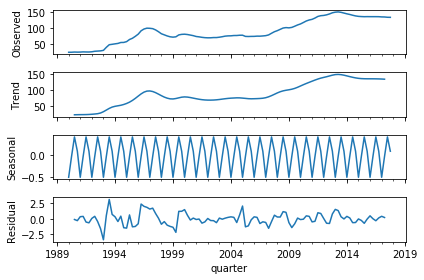

,index
quarter,
1990-01-01,24.3
1990-04-01,24.4
1990-07-01,25.0
1990-10-01,24.7
1991-01-01,24.9
1991-04-01,25.5
1991-07-01,25.2
1991-10-01,25.1
1992-01-01,25.8


In [136]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('../data/hdb-resale-price-index/housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv',
                 parse_dates=True, index_col=0)

additive = seasonal_decompose(df) # Observed = Trend + Seasonal + Residual

additive.plot()
plt.show()
additive?
df

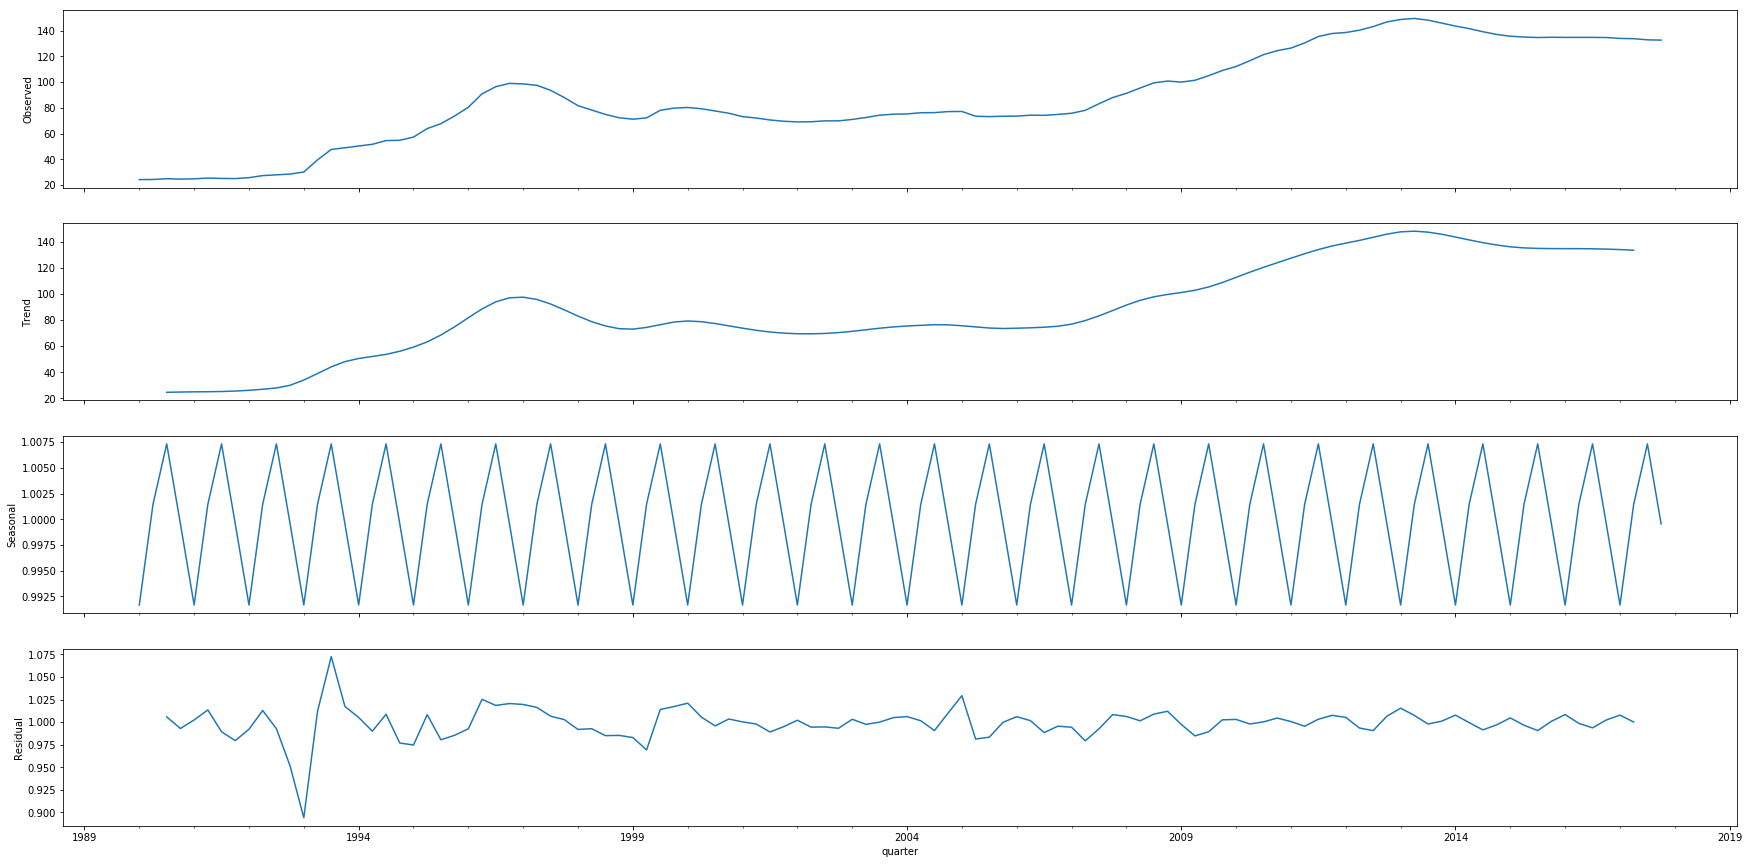

In [21]:
mult = seasonal_decompose(df, model='multiplicative') # Observed = Trend * Seasonal * Residual

# mult.plot() # cannot resize :(

# https://github.com/statsmodels/statsmodels/blob/master/statsmodels/tsa/seasonal.py#L176
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(30, 15))

mult.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')

mult.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')

mult.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

mult.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')

plt.show()

## Implementation Notes for `seasonal_decompose`
    
- Trend: Convolutional filter to compute moving average of Observed. (http://matlabtricks.com/post-11/moving-average-by-convolution)

- Seasonal: compute seasonal mean (Quarterly -> 4 means: one for Q1, Q2, Q3, Q4). Return the means for each quarter across time period.

- Residual: subtract (or divide out) the Trend and Seasonal from Observed.

Details: https://github.com/statsmodels/statsmodels/blob/master/statsmodels/tsa/seasonal.py#L53

### Pseudo-code explanation
```
mult.trend = convolution(mult.observed, filter_moving_average)

detrended = mult.observed - mult.trend

seasonal_mean(detrended) # [seasonal_mean_q1, seasonal_mean_q2, seasonal_mean_q3, seasonal_mean_q4]

# for every Q1 date => seasonal_mean_q1
# ...
mult.seasonal = np.tile(period_averages.T, nobs // freq + 1).T[:nobs]

mult.resid = detrended - mult.seasonal #  mult.observed - mult.trend - mult.seasonal
```

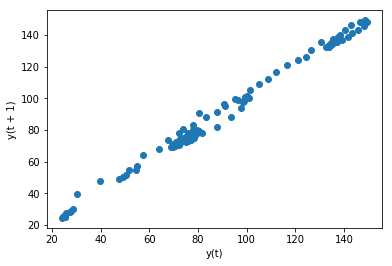

In [22]:
# Lag plot
from pandas.plotting import lag_plot

lag_plot(df)

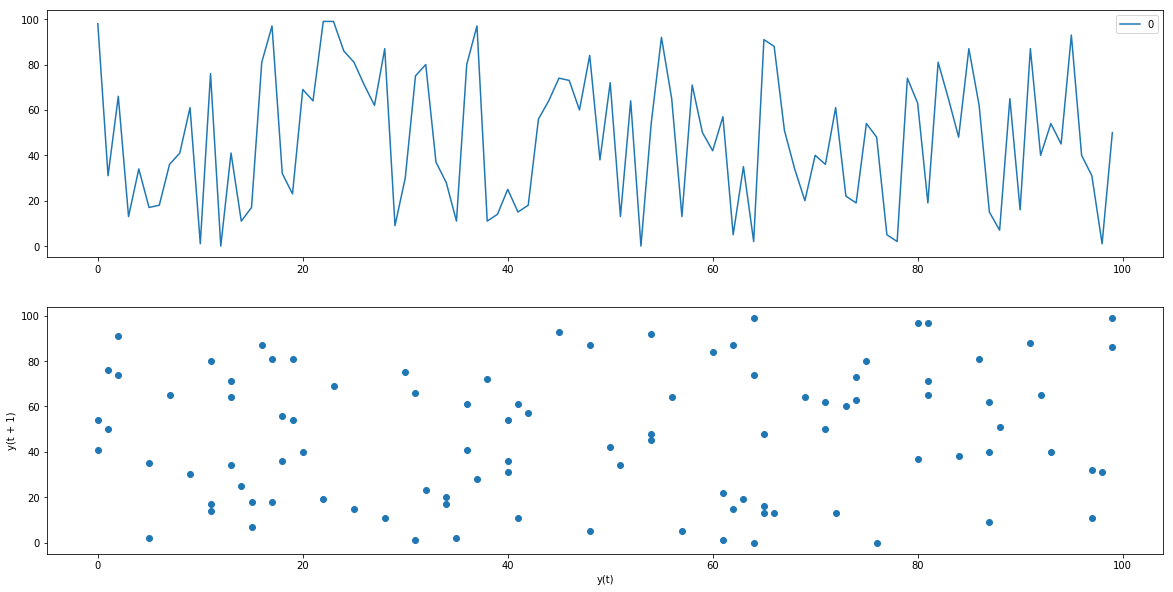

In [23]:
# generate a random series
import numpy as np
random_df = pd.DataFrame(np.random.randint(0, 100, size=(100, 1)))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
random_df.plot(ax=ax1) # series plot
pd.plotting.lag_plot(random_df, ax=ax2) # lag plot (shows no correlation!)

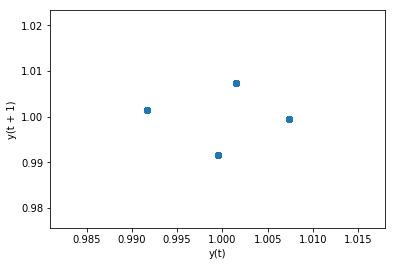

In [24]:
# lag plot of:

lag_plot(mult.seasonal)

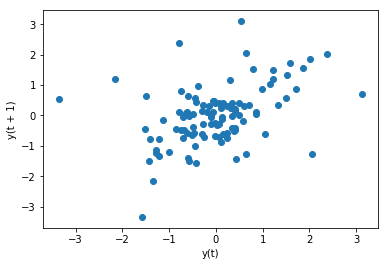

In [25]:
lag_plot(additive.resid)

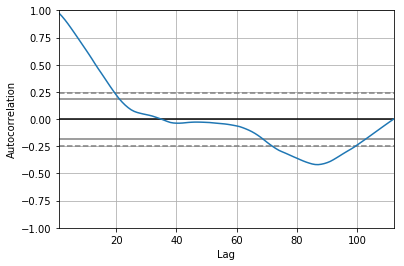

In [26]:
# Auto correlation

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)

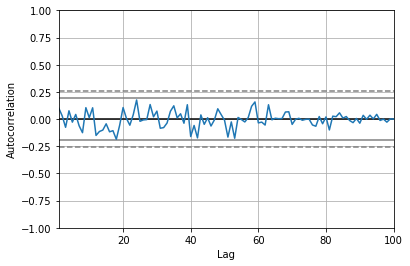

In [27]:
autocorrelation_plot(random_df)

In [28]:
# Alternative to calling .autocorr in a loop with different lag value
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.autocorr.html

def get_auto_correlation(series):
    from pandas.compat import range, lmap
    import numpy as np
    
    # https://github.com/pandas-dev/pandas/blob/master/pandas/plotting/_misc.py
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        return ((data[:n - h] - mean) *
                    (data[h:] - mean)).sum() / float(n) / c0
    x = np.arange(n) + 1
    y = lmap(r, x)
    return x, y

lag, correlations = get_auto_correlation(df)
correlations

[0.9760519867520391,
 0.946808538549694,
 0.9136833895056503,
 0.8773821220822616,
 0.8386167587909488,
 0.7987587202187545,
 0.758485336299841,
 0.717821507174669,
 0.6769207515843969,
 0.6363009390173534,
 0.5950776466412245,
 0.5525037299493976,
 0.5083517182108724,
 0.4661454778153262,
 0.42571746867211285,
 0.3845185732123036,
 0.34293286429961145,
 0.3014770030744584,
 0.26171464784540044,
 0.2232073726617577,
 0.18716744630888,
 0.15605335965271516,
 0.12842993208264528,
 0.10491568157499226,
 0.08506117712459077,
 0.0707022920217321,
 0.06067420816272616,
 0.0533453514989912,
 0.046789510552429005,
 0.040849670851515515,
 0.0348285528272374,
 0.0277545172790531,
 0.01865635564429191,
 0.00908729942731057,
 -0.0008898709579773951,
 -0.011336692809365308,
 -0.0220903734222542,
 -0.031337536370310226,
 -0.035952323471476415,
 -0.03781558100502472,
 -0.03779041705856658,
 -0.03627308312999366,
 -0.033549033570711685,
 -0.030712458823742433,
 -0.028925870091320326,
 -0.0277815478548

# Exercise (after break) (25 mins)

# Dataset
https://data.gov.sg/dataset/average-weekly-paid-hours-worked-per-employee-by-industry-and-type-of-employment-annual?resource_id=ecc88c54-6d33-4d1c-9af5-896825386d56

Use: average-weekly-paid-hours-worked-per-employee-by-type-of-employment-

Plot for nature_of_employment == full-time, total_paid_hours

1. Decomposition plot
2. Lag plot
3. Autocorrelation plot

In [29]:
import statsmodels

statsmodels.__version__

'0.9.0'

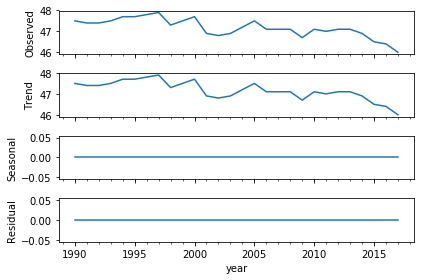

year
1990-01-01    0.0
1991-01-01    0.0
1992-01-01    0.0
1993-01-01    0.0
1994-01-01    0.0
1995-01-01    0.0
1996-01-01    0.0
1997-01-01    0.0
1998-01-01    0.0
1999-01-01    0.0
2000-01-01    0.0
2001-01-01    0.0
2002-01-01    0.0
2003-01-01    0.0
2004-01-01    0.0
2005-01-01    0.0
2006-01-01    0.0
2007-01-01    0.0
2008-01-01    0.0
2009-01-01    0.0
2010-01-01    0.0
2011-01-01    0.0
2012-01-01    0.0
2013-01-01    0.0
2014-01-01    0.0
2015-01-01    0.0
2016-01-01    0.0
2017-01-01    0.0
Name: total_paid_hours, dtype: float64
year
1990-01-01    0.0
1991-01-01    0.0
1992-01-01    0.0
1993-01-01    0.0
1994-01-01    0.0
1995-01-01    0.0
1996-01-01    0.0
1997-01-01    0.0
1998-01-01    0.0
1999-01-01    0.0
2000-01-01    0.0
2001-01-01    0.0
2002-01-01    0.0
2003-01-01    0.0
2004-01-01    0.0
2005-01-01    0.0
2006-01-01    0.0
2007-01-01    0.0
2008-01-01    0.0
2009-01-01    0.0
2010-01-01    0.0
2011-01-01    0.0
2012-01-01    0.0
2013-01-01    0.0
2014-01-01    0

In [30]:
df = pd.read_csv('../data/weekly-paid-hours/average-weekly-paid-hours-worked-per-employee-by-type-of-employment-topline.csv',
                 parse_dates=True, index_col=0)

df1 = df[df.nature_of_employment=='full-time'].loc[:, 'total_paid_hours']
df1

additive = seasonal_decompose(df1)
additive.plot()
plt.show()

print(additive.seasonal) # all 0
print(additive.observed - additive.trend) # also 0

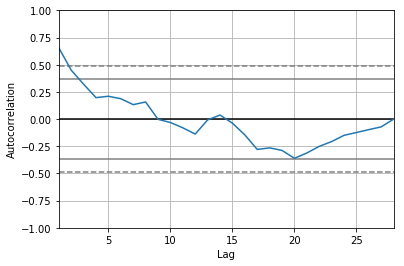

In [31]:
autocorrelation_plot(df1)

In [32]:
# z95 = 1.959963984540054
# z99 = 2.5758293035489004
#
# ax.axhline(y=z99 / np.sqrt(n), linestyle='--', color='grey')
# ax.axhline(y=z95 / np.sqrt(n), color='grey')

lag, correlations = get_auto_correlation(df1)
correlations

[0.6550022772126901,
 0.4497495066039134,
 0.3202140579930129,
 0.19732047973280392,
 0.20992105662668661,
 0.18718688325489358,
 0.13283740701381305,
 0.15739335053893888,
 -0.0024290268711106046,
 -0.03153939577956499,
 -0.08030970092606532,
 -0.13784727493547755,
 -0.0072870806133275194,
 0.036928799149842054,
 -0.0378776377713669,
 -0.1453620768179743,
 -0.27914832245331744,
 -0.26468802186124074,
 -0.28821921967511616,
 -0.3606345832700773,
 -0.31190223166843734,
 -0.250948838621527,
 -0.2067329588583561,
 -0.14949901320783113,
 -0.12361469561256747,
 -0.09693335357522197,
 -0.07158038560801472,
 0.0]

In [33]:
lag

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

## Auto-regressive models

$AR(p): X_t=c + \sum_{i=1}^p \varphi_iX_{t-i} + \varepsilon_t$

# lag = p = 2 
X[t] = constant + (phi_1 * X[t-1] + phi_2 * X[t-2]) + residual[t]

## Moving Average models

$MA(p): X_t=\mu + \varepsilon_t + \sum_{i=1}^p\theta_i\varepsilon_{t-i}$

# lag = q = p = 2
X[t] = mean + residual[t] + (theta_1 * residual[t-1] +
                             theta_2 * residual[t-2])

## ARMA

$ARMA(p, q): AR(p) + MA(q)$

$X_t=c + \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q\theta_i\varepsilon_{t-i}$

## Setup

```
(mldds03) conda install patsy
```

(84, 1)
(28, 1)
-36.17913007843642
1232.9623856981066


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


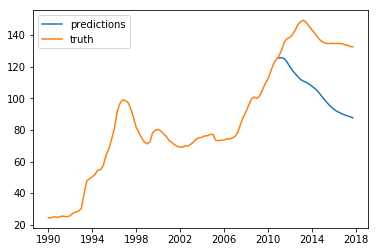

In [35]:
# train test split
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR

df = pd.read_csv('../data/hdb-resale-price-index/housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv',
                 parse_dates=True, index_col=0)


# 1. No shuffling (otherwise will lose time sequence)
# 2. No 'y' - you are predicting X[t]
#
# Normally (non-time series):
#   X_train, X_test, y_train, y_test = train_test_split(df) # shuffle=True
#
train, test = train_test_split(df, shuffle=False) # shuffle=False!!
print(train.shape)
print(test.shape)

# fit
ar = AR(train)
model = ar.fit() # OR: model = AR(train).fit()

#print('aic', model.aic, # read-up - which is used?
#      '\nbic', model.bic, # read-up
#      '\np', model.k_ar,
#      '\nparams', model.params)

# predict
start = test.index[0] # 2011-Q1
end = test.index[-1] # 2017-Q4
predictions = model.predict(start, end)

fig, ax = plt.subplots()
ax.plot(predictions, label='predictions')
ax.plot(df, label='truth')
ax.legend()

# Regression metrics work here
# metrics (means square error, r2_score)
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(test.values, predictions.values))
print(mean_squared_error(test.values, predictions.values))

In [43]:
from statsmodels.tsa.stattools import arma_order_select_ic

# Run arma_order_select_ic with train to select best p & q
# fit ARMA on train
# predict
# metrics

# Auto-regressive + Moving average
ic = arma_order_select_ic(train, max_ar=5, max_ma=5, ic=['bic', 'aic'])

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\issohl\AppData\Local\Continuum\mi

In [44]:
ic

{'bic':             0           1           2           3           4           5
 0  786.504710  684.581503  599.711668  552.963321  505.856048  474.569093
 1  453.510409  403.649336  387.865511  389.711775  393.827546  382.715812
 2  377.437250  380.700307  384.956060  389.307842  391.887083  385.884811
 3  380.895157  384.835117         NaN  393.086797  395.906992  390.304090
 4  384.817699         NaN         NaN  387.940575  392.340661  393.129514
 5  389.237993  392.984678  400.608741         NaN         NaN  395.486862,
 'aic':             0           1           2           3           4           5
 0  781.643076  677.289053  589.988400  540.809237  491.271147  457.553375
 1  446.217959  393.926069  375.711427  375.126874  376.811828  363.269277
 2  367.713983  368.546223  370.371159  372.292124  372.440548  364.007460
 3  368.741073  370.250216         NaN  373.640262  374.029640  365.995922
 4  370.232798         NaN         NaN  366.063224  368.032493  366.390529
 5  372.22

In [54]:
# fit using recommended (p, q)'s
from statsmodels.tsa.arima_model import ARMA

# lowest BIC metric (Bayesian Information Criterion)
print(ic.bic_min_order)
arma_bic = ARMA(train, ic.bic_min_order)
arma_bic_model = arma_bic.fit() # wrapper

# X[t] = const + ar.L1.index * X[t-1] + ar.L2.index * X[t-2] + noise[t]
print('aic', arma_bic_model.aic,
      '\nbic', arma_bic_model.bic,
      '\np', arma_bic_model.k_ar,
      '\nq', arma_bic_model.k_ma,
      '\nparams', arma_bic_model.params)

# lowest AIC metric
print(ic.aic_min_order)

# Short exercise: fit the lowest AIC metric ARMA model
# State your preference
arma_aic = ARMA(train, ic.aic_min_order)
arma_aic_model = arma_aic.fit() # wrapper

# X[t] = const + ar.L1.index * X[t-1] + 
#         ma.L1.index * noise[t-1] + ma.L2.index * noise[t-2] + 
#         ma.L3.index * noise[t-3] + ma.L4.index * noise[t-4] + 
#         ma.L5.index * noise[t-5]

print('aic', arma_aic_model.aic,
      '\nbic', arma_aic_model.bic,
      '\np', arma_aic_model.k_ar,
      '\nq', arma_aic_model.k_ma,
      '\nparams', arma_aic_model.params)


#arma_bic_model?

(2, 0)


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


aic 367.71398277272095 
bic 377.4372499680942 
p 2 
q 0 
params const          74.551114
ar.L1.index     1.788216
ar.L2.index    -0.796209
dtype: float64
(1, 5)


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


aic 363.2692772213617 
bic 382.71581161210815 
p 1 
q 5 
params const          73.944596
ar.L1.index     0.984302
ma.L1.index     0.901068
ma.L2.index     0.692163
ma.L3.index     0.453089
ma.L4.index     0.406475
ma.L5.index     0.422158
dtype: float64


In [ ]:
# Exercise:
#
# plot the predictions for
#   arma_aic_model using test
#   arma_bic_model using test
#
# plot the truth (df or test - choose one)
#
# Choose which model you prefer from plot
# If hard to see from plot, compute metrics (r2 or mse, ?)

-11.185484627322003
404.10424249556263
-19.10031262071961
666.5817449153845


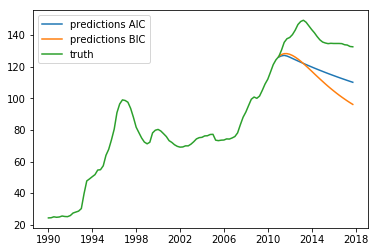

In [64]:
# predict
start = test.index[0] # 2011-Q1
end = test.index[-1] # 2017-Q4
predictions_aic = arma_aic_model.predict(start, end)
predictions_bic = arma_bic_model.predict(start, end)

fig, ax = plt.subplots()
ax.plot(predictions_aic, label='predictions AIC')
ax.plot(predictions_bic, label='predictions BIC')
ax.plot(df, label='truth')
ax.legend()

print(r2_score(test.values, predictions_aic.values))
print(mean_squared_error(test.values, predictions_aic.values))
print(r2_score(test.values, predictions_bic.values))
print(mean_squared_error(test.values, predictions_bic.values))

In [82]:
# Split from 2016

test = df[df.index > '2015-12-01'] # 2016 and later
train = df[df.index <= '2015-12-01'] # 2015 and earlier

ic = arma_order_select_ic(train, max_ar=5, max_ma=5, ic=['bic', 'aic'])

#'bic_min_order': (2, 0),
# 'aic_min_order': (2, 5)

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\l

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


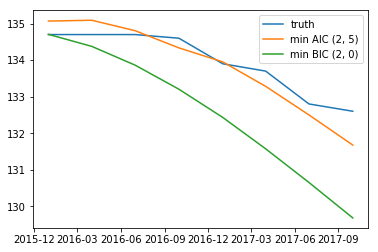

In [90]:
model_aic = ARMA(train, ic.aic_min_order).fit()
model_bic = ARMA(train, ic.bic_min_order).fit()

start = test.index[0]
end = test.index[-1]

predict_aic = model_aic.predict(start, end)
predict_bic = model_bic.predict(start, end)

fig, ax = plt.subplots()
ax.plot(test,  label='truth')
ax.plot(predict_aic, label='min AIC %s' % str(ic.aic_min_order))
ax.plot(predict_bic, label='min BIC %s' % str(ic.bic_min_order))
ax.legend()

In [93]:
print(r2_score(test.values, predict_aic.values))
print(mean_squared_error(test.values, predict_aic.values))

print(r2_score(test.values, predict_bic.values))
print(mean_squared_error(test.values, predict_bic.values))

0.7189966560222544
0.1868233169727021
-3.248502359056614
2.824590240279012


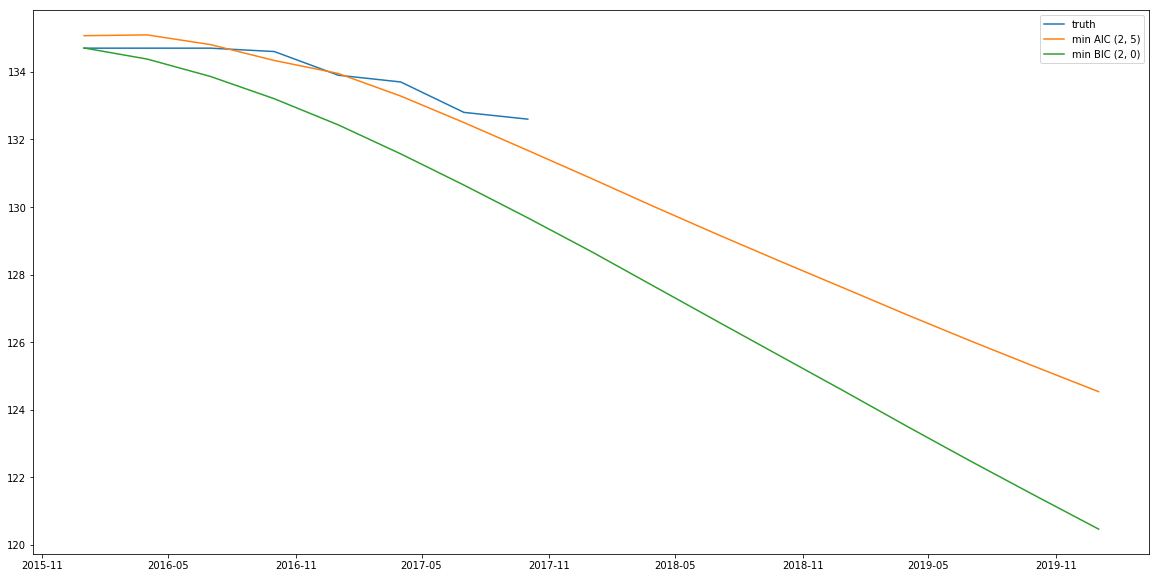

In [96]:
# Predict future

start = test.index[0]
end = pd.to_datetime('2020-01-01')

predict_aic = model_aic.predict(start, end)
predict_bic = model_bic.predict(start, end)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(test,  label='truth')
ax.plot(predict_aic, label='min AIC %s' % str(ic.aic_min_order))
ax.plot(predict_bic, label='min BIC %s' % str(ic.bic_min_order))
ax.legend()

# ARIMA

$ARIMA(p, d, q): X'_t = c + \varepsilon_t + \sum_{i=1}^p \varphi_i X'_{t-i} + \sum_{i=1}^q\theta_i\varepsilon_{t-i}$

$X'_t$ = $X_t$, Differentiated $d$ times

Time Series Stationarity
- Makes time series "stationary" so that we can model it better
- Do this by differentiation (taking the gradient)

(analogous to applying non-linear transformation to data)

In [104]:
from statsmodels.tsa.arima_model import ARIMA

# order : iterable
#    The (p,d,q) order of the model for the number of AR parameters,
#    differences, and MA parameters to use.

pdq_aic = None
pdq_bic = None
min_aic = np.inf
min_bic = np.inf

model_aic = None
model_bic = None

ds = [0, 1, 2]
ps = [0, 1, 2, 3]
qs = [0, 1, 2, 3]

for p in ps:
    for q in qs:
        for d in ds:
            try:
                model = ARIMA(train, (p, d, q)).fit()
                print((p, d, q), 'aic', model.aic, 'bic', model.bic)
                
                if model.aic < min_aic:
                    pdq_aic = (p, d, q)
                    min_aic = model.aic
                    model_aic = model

                if model.bic < min_bic:
                    pdq_bic = (p, d, q)
                    min_bic = model.bic
                    model_bic = model
                    
            except:
                print((p, d, q), 'fail, skipping')
                pass
            
print('min aic pdq', pdq_aic)
print('min bic pdq', pdq_bic)

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

(0, 0, 0) aic 1039.1664292518856 bic 1044.4552110501684
(0, 1, 0) aic 513.7761191868603 bic 519.0455771633196
(0, 2, 0) aic 431.46179788665114 bic 436.7117435132197
(0, 0, 1) aic 905.1380950969312 bic 913.0712677943553
(0, 1, 1) aic 450.11705342573276 bic 458.02124039042167
(0, 2, 1) aic 433.36750234404633 bic 441.24242078389915
(0, 0, 2) fail, skipping
(0, 1, 2) fail, skipping


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

(0, 2, 2) aic 431.7868415827397 bic 442.2867328358768
(0, 0, 3) fail, skipping
(0, 1, 3) fail, skipping
(0, 2, 3) aic 429.4957816385197 bic 442.62064570494107


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

(1, 0, 0) aic 539.9428505829865 bic 547.8760232804105
(1, 1, 0) aic 424.91729946473583 bic 432.82148642942474
(1, 2, 0) aic 433.4038734691462 bic 441.27879190899904


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

(1, 0, 1) aic 471.67154850540317 bic 482.24911210196865
(1, 1, 1) aic 423.9961930348324 bic 434.53510898775096


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(1, 2, 1) aic 433.8241069747306 bic 444.3239982278677


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(1, 0, 2) aic 447.28499777329324 bic 460.5069522690001
(1, 1, 2) aic 425.9679068765139 bic 439.14155181766205


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(1, 2, 2) aic 424.91763310381754 bic 438.0424971702389


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(1, 0, 3) aic 445.6293160736151 bic 461.4956614684633


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(1, 1, 3) aic 427.6980195048442 bic 443.506393434222


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(1, 2, 3) aic 426.84452774785495 bic 442.5943646275606
(2, 0, 0) aic 438.0735993022405 bic 448.651162898806


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(2, 1, 0) aic 424.3450685952858 bic 434.88398454820435
(2, 2, 0) aic 431.3841943195754 bic 441.8840855727125


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\issohl\AppData\Local\C

(2, 0, 1) aic 438.01741318345637 bic 451.23936767916325
(2, 1, 1) aic 425.97928255046395 bic 439.1529274916121
(2, 2, 1) aic 433.05340652579184 bic 446.1782705922132


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(2, 0, 2) aic 439.7022643995114 bic 455.56860979435965
(2, 1, 2) aic 427.22734319531094 bic 443.03571712468874


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(2, 2, 2) aic 426.9680612290522 bic 442.7178981087578


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(2, 0, 3) aic 441.2859926699731 bic 459.7967289639627


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(2, 1, 3) aic 429.5492447710779 bic 447.99234768868536


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(2, 2, 3) aic 424.2192724375984 bic 442.59408213058833


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(3, 0, 0) aic 438.4378133161182 bic 451.6597678118251
(3, 1, 0) aic 425.86492456230735 bic 439.0385695034555
(3, 2, 0) aic 432.77570266560826 bic 445.90056673202963


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Contin

(3, 0, 1) aic 440.8605458287981 bic 456.7268912236463
(3, 1, 1) aic 427.8495196654155 bic 443.65789359479334
(3, 2, 1) aic 434.44570116967634 bic 450.195538049382
(3, 0, 2) fail, skipping


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No freq

(3, 1, 2) aic 417.1458233220847 bic 435.58892623969217


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(3, 2, 2) aic 424.43638023309836 bic 442.8111899260883
(3, 0, 3) fail, skipping


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(3, 1, 3) aic 418.95686300719296 bic 440.0346949130301


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


(3, 2, 3) aic 417.94423584758607 bic 438.94401835386026
min aic pdq (3, 1, 2)
min bic pdq (1, 1, 0)


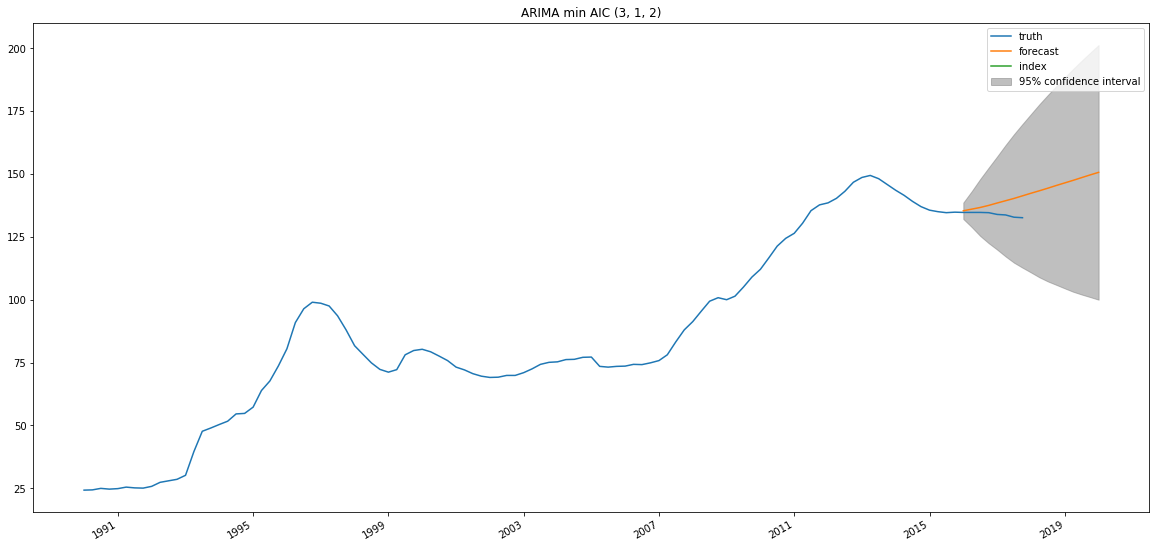

In [113]:
# predict

start = test.index[0]
end = pd.to_datetime('2020-01-01')

# predict_aic = model_aic.predict(start, end)
# predict_bic = model_bic.predict(start, end)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('ARIMA min AIC %s' % str(pdq_aic))
ax.plot(df, label='truth')
model_aic.plot_predict(start, end, ax=ax)
ax.legend()

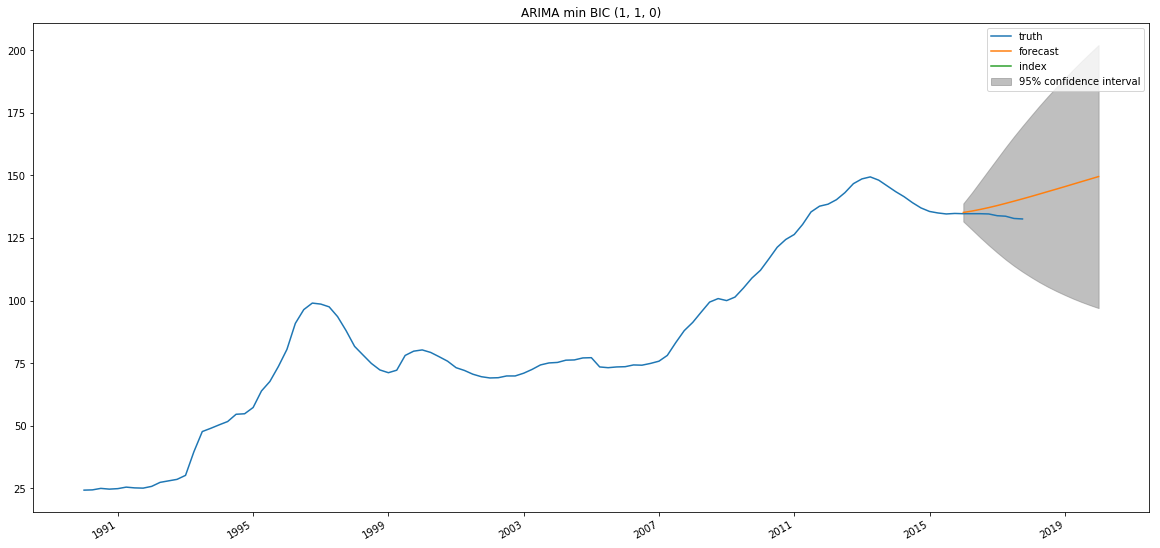

In [114]:
# predict

start = test.index[0]
end = pd.to_datetime('2020-01-01')

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('ARIMA min BIC %s' % str(pdq_bic))
ax.plot(df, label='truth')
model_bic.plot_predict(start, end, ax=ax)
ax.legend()

In [131]:
predictions = model_bic.predict(start, end)

predictions # differences from the last value

2016-01-01    0.395394
2016-04-01    0.544169
2016-07-01    0.657449
2016-10-01    0.743702
2017-01-01    0.809377
2017-04-01    0.859382
2017-07-01    0.897457
2017-10-01    0.926447
2018-01-01    0.948521
2018-04-01    0.965329
2018-07-01    0.978126
2018-10-01    0.987870
2019-01-01    0.995290
2019-04-01    1.000939
2019-07-01    1.005240
2019-10-01    1.008515
2020-01-01    1.011009
Freq: QS-OCT, dtype: float64

In [133]:
# Unlike AR or ARMA, ARIMA returns differences in predict
# Instead, use forecast()

# Returns:
# forecast (array) – Array of out of sample forecasts
# stderr (array) – Array of the standard error of the forecasts.
# conf_int (array) – 2d array of the confidence interval for the forecast
model_bic.forecast(steps=4)

(array([135.19539374, 135.73956311, 136.3970124 , 137.14071467]),
 array([1.84122717, 3.72937416, 5.69997118, 7.66412752]),
 array([[131.58665481, 138.80413268],
        [128.43012407, 143.04900216],
        [125.22527418, 147.56875063],
        [122.11930075, 152.16212858]]))

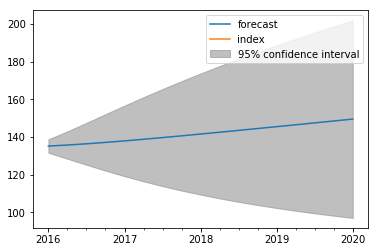

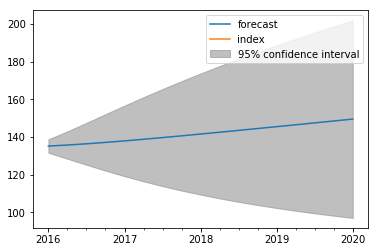

In [134]:
model_bic.plot_predict(start, end)

In [115]:
from pyramid.arima import auto_arima

# auto_arima is a wrapper around R's auto.arima
# https://www.rdocumentation.org/packages/forecast/versions/7.3/topics/auto.arima
stepwise_fit = auto_arima(y=train, start_p=1, start_q=1, max_p=10, max_q=10,
                          seasonal=True, max_d=5, trace=True,
                          error_action='ignore', # don't want to know if an order does not work
                          suppress_warnings=True, # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=423.996, BIC=434.535, Fit time=0.080 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=513.776, BIC=519.046, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=424.917, BIC=432.822, Fit time=0.044 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=450.117, BIC=458.021, Fit time=0.062 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=425.979, BIC=439.153, Fit time=0.163 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=425.968, BIC=439.142, Fit time=0.214 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=427.996, BIC=443.805, Fit time=0.205 seconds
Total fit time: 0.786 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -207.998
Date:                Sat, 11 Aug 2018   AIC                            423.996
Time:                        15:43:38   BIC                            434.535
Sample:                             0   HQIC                           428.265
                                - 104                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3393      0.296      1.148      0.251      -0.240       0.919
ar.L1          0.6718      0.075      8.898      0.000       0.524       0.820
ma.L1          0.2238      0.107      2.086      0.037       0.013       0.434
sigma2         3.2932      0.323     10.190      0.000       2.660       3.927
===================================================================================
Ljung-Box (Q):                       50.82   Jarque-Bera (JB):                53.81
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
# Exogenous variable:
# Govt policy = extra foreign tax from 2015-2016
#   Cause price to go up
# a)  Takes effect on price immediately
#

# Add exogenous variable == feature
# policy_on = 1 if policy is on 2015-2016, 0 otherwise
# [0 0 0 .... 1 1 1 ... 0 0 0 0 0]
#
#
# b)  Takes effect on price after 2 quarters
#
#  policy_on_last_2_quarters
#    = 1 in 2016 Q3 - 2017 Q2
#    = 0 otherwise
#
# [0 0 0 .... 0 0 1 1 1 ... 0 0 0]
#
#
# Model with Statistics (exogenous feature) 
# or Deep Learning (add 1 more feature)

In [67]:
from sklearn.model_selection import TimeSeriesSplit

tcsv = TimeSeriesSplit(n_splits=3)
print(tcsv)

TimeSeriesSplit(max_train_size=None, n_splits=3)
